In [5]:
import pandas as pd
credit = pd.read_csv('credit_customers.csv')


In [6]:

for col in credit.columns:
    if credit[col].dtype == 'object':
        print('Column Name:', col)
        print('Unique Values:', credit[col].unique())
        print('Number of Unique Values:', len(credit[col].unique()))
        print('\n')


checking_status: 4 unique values
credit_history: 5 unique values
purpose: 10 unique values
savings_status: 5 unique values
employment: 5 unique values
personal_status: 4 unique values
other_parties: 3 unique values
property_magnitude: 4 unique values
other_payment_plans: 3 unique values
housing: 3 unique values
job: 4 unique values
own_telephone: 2 unique values
foreign_worker: 2 unique values
class: 2 unique values


In [ ]:

# Split 'personal_status' into 2 columns
credit[['gender', 'marital_status']] = credit['personal_status'].str.split(' ', expand=True)

# Drop old column
credit.drop('personal_status', axis=1, inplace=True)


In [ ]:

# List of categorical features
cat_features = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'gender', 'marital_status']

# Visualize categorical features
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cat_features):
        sns.countplot(x=cat_features[i], data=credit, ax=ax)
        ax.set_title(cat_features[i] + '_count')

plt.tight_layout()
plt.show()


In [ ]:

# Pieplot
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cat_features):
        credit[cat_features[i]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
        ax.set_title(cat_features[i] + '_pieplot')

plt.tight_layout()
plt.show()


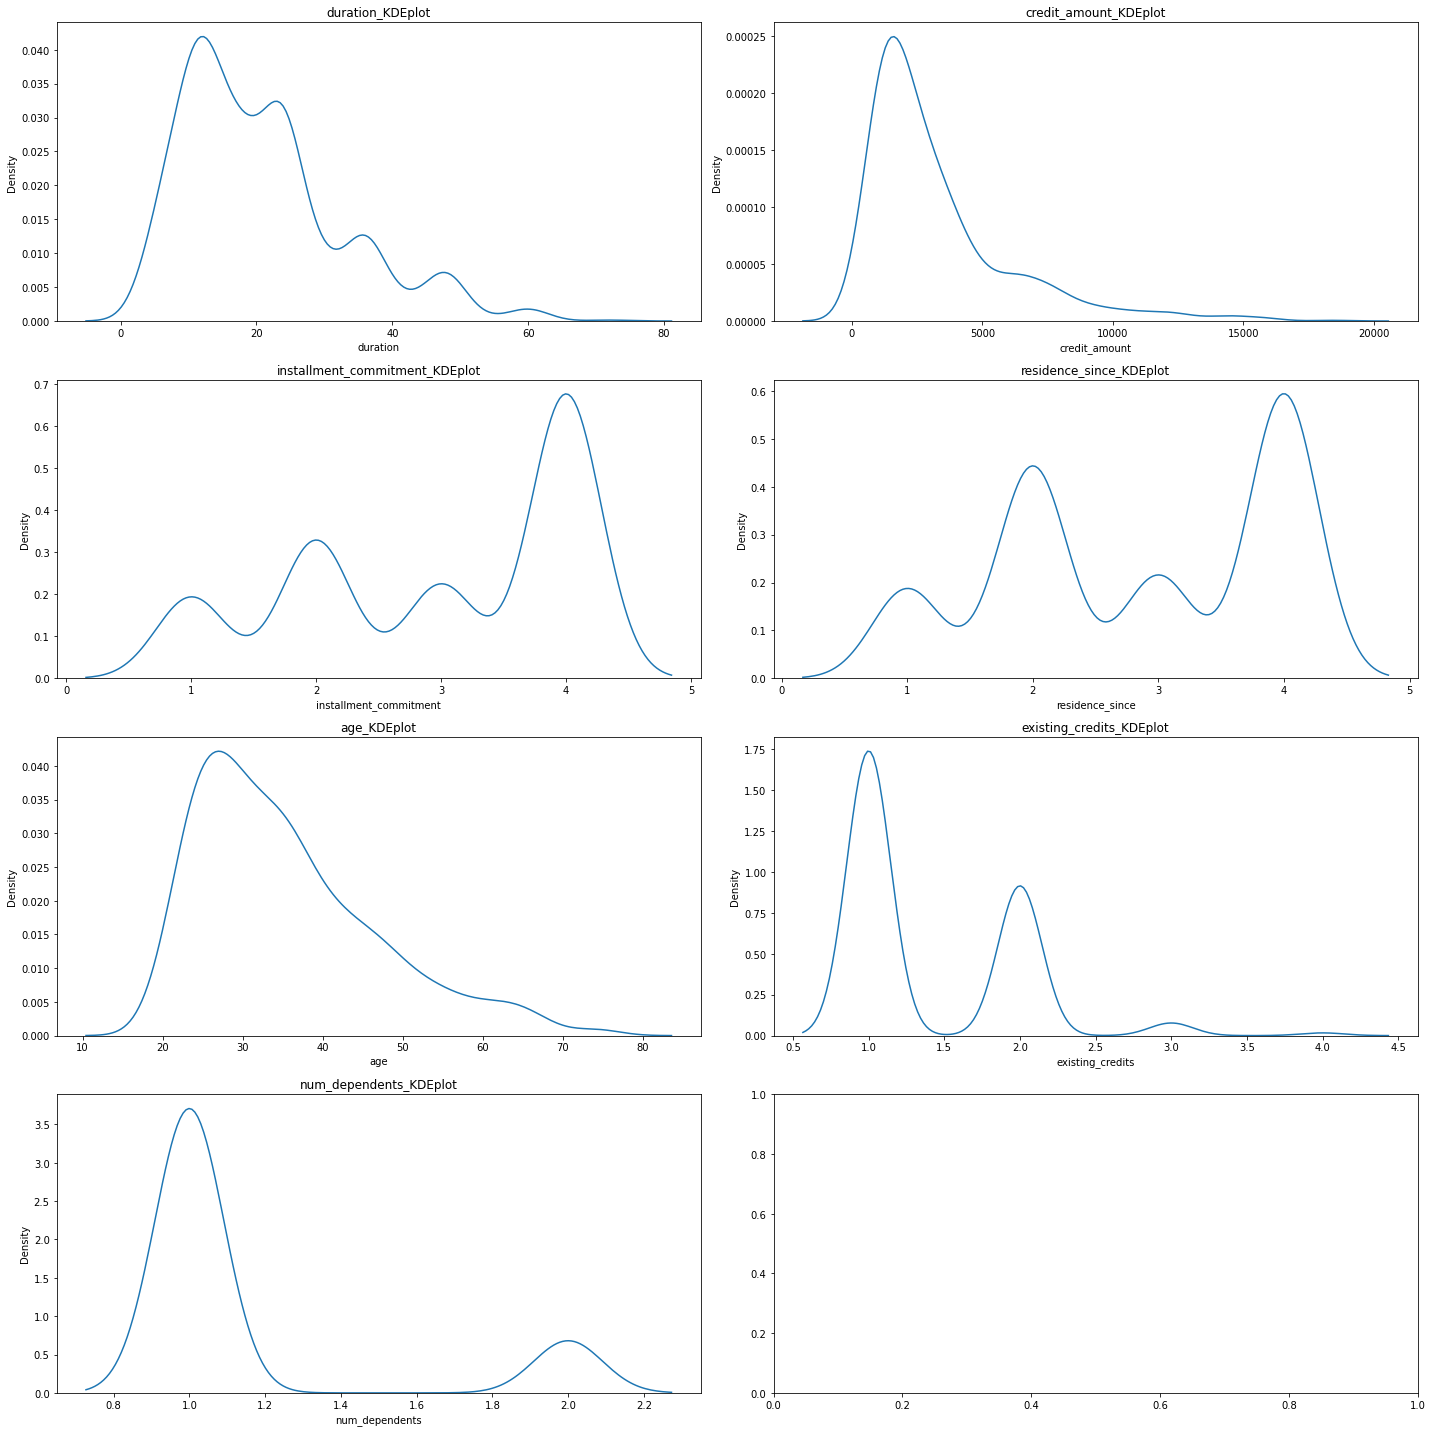

In [11]:

# List of numerical features
num_features = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

# KDEplot
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(num_features):
        sns.kdeplot(credit[num_features[i]], ax=ax)
        ax.set_title(num_features[i] + '_KDEplot')

plt.tight_layout()
plt.show()


In [ ]:

# Countplot
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cat_features):
        sns.countplot(x=cat_features[i], hue='class', data=credit, ax=ax)
        ax.set_title(cat_features[i] + '_countplot')

plt.tight_layout()
plt.show()


In [ ]:

# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_features:
    credit[col] = le.fit_transform(credit[col])

# Target Encoding
credit['class'] = le.fit_transform(credit['class'])


In [ ]:

# Scale numerical feature by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in num_features:
    credit[col] = scaler.fit_transform(credit[[col]])


In [ ]:

# Split training and testing data
from sklearn.model_selection import train_test_split

X = credit.drop('class', axis=1)
y = credit['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Show accuracy, f1-score, confusion matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = logreg.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


In [ ]:

# Train Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Show accuracy, f1-score, confusion matrix
y_pred = nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


['Logistic Regression', 'Naive Bayes']
[[0.8217391304347827], [0.812206572769953]]


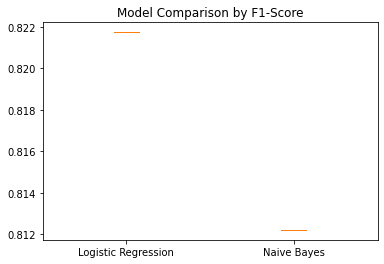

In [20]:

# Plot model comparison by f1-score by Boxplot
import numpy as np

models = ['Logistic Regression', 'Naive Bayes']
f1_scores = [[f1_score(y_test, logreg.predict(X_test))], [f1_score(y_test, nb.predict(X_test))]]
print(models)
print(f1_scores)

plt.boxplot(f1_scores, labels=models)
plt.title('Model Comparison by F1-Score')
plt.show()
